In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sentiment = pd.read_csv("/fear_greed_index.csv")
trades = pd.read_csv("/historical_data.csv")


In [ ]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment.shape
trades.shape


(27932, 16)

In [ ]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [ ]:
sentiment.isnull().sum()


,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
trades.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
trades = trades.dropna()



In [ ]:
trades.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
sentiment.duplicated().sum()
trades.duplicated().sum()


np.int64(0)

In [ ]:
sentiment.dtypes
trades.dtypes


,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [ ]:
sentiment["date"] = pd.to_datetime(sentiment["date"])


In [ ]:
trades.columns = trades.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
trades["timestamp_ist"] = pd.to_datetime(trades["timestamp_ist"])


ValueError: time data "18-03-2025 12:50" doesn't match format "%m-%d-%Y %H:%M", at position 18. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
trades["timestamp_ist"] = pd.to_datetime(
    trades["timestamp_ist"],
    dayfirst=True
)


In [ ]:
trades["timestamp_ist"] = pd.to_datetime(
    trades["timestamp_ist"],
    format="%d-%m-%Y %H:%M"
)


In [ ]:
trades["timestamp_ist"].head()


,timestamp_ist
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00


In [ ]:
trades["date"] = trades["timestamp_ist"].dt.date


In [ ]:
type(trades["date"].iloc[0])


datetime.date

In [ ]:
trades["date"].isnull().sum()


np.int64(0)

merging  2 dataset

In [ ]:
sentiment.columns = sentiment.columns.str.strip().str.lower()
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [ ]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
merged = trades.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)


In [ ]:
merged["classification"].value_counts(dropna=False)


,count
classification,
Fear,9316
Greed,7748
Neutral,5743
Extreme Greed,4126
Extreme Fear,992
NaN,6


In [ ]:
merged[["date", "classification"]].head(10)


,date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed
5,2024-12-02,Extreme Greed
6,2024-12-02,Extreme Greed
7,2024-12-02,Extreme Greed
8,2024-12-02,Extreme Greed
9,2024-12-02,Extreme Greed


In [ ]:
merged[merged["classification"].isnull()][["date"]].drop_duplicates()


,date
727,2024-10-26


In [ ]:
merged_clean = merged.dropna(subset=["classification"])


In [ ]:
merged_clean["classification"].isnull().sum()


np.int64(0)

feature engineering  

Q1. How does daily trader PnL vary across market sentiment?

Daily total PnL per trader
Compare across Fear vs Greed days


In [ ]:
daily_pnl = merged_clean.groupby(
    ["account", "date", "classification"]
)["closed_pnl"].sum().reset_index()

daily_pnl.head()


,account,date,classification,closed_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1


What is the win rate under different sentiment regimes?

Mark each trade as win or loss

Calculate average win rate by sentiment

In [ ]:
merged_clean["win"] = merged_clean["closed_pnl"] > 0

win_rate = merged_clean.groupby(
    "classification"
)["win"].mean().reset_index()

win_rate


/tmp/ipython-input-1737400117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean["win"] = merged_clean["closed_pnl"] > 0


,classification,win
0,Extreme Fear,0.301411
1,Extreme Greed,0.242850
2,Fear,0.401997
3,Greed,0.365901
4,Neutral,0.465610


Does trade frequency change with market sentiment?

Number of trades per day under Fear vs Greed

In [ ]:
trades_per_day = merged_clean.groupby(
    ["date", "classification"]
).size().reset_index(name="trade_count")

trades_per_day.head()


,date,classification,trade_count
0,2024-03-13,Extreme Greed,7
1,2024-03-14,Extreme Greed,1
2,2024-03-15,Extreme Greed,8
3,2024-03-16,Extreme Greed,6
4,2024-03-17,Extreme Greed,14


In [ ]:
merged_clean.columns


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'classification', 'win'],
      dtype='object')

Compare trade size (USD) distribution across Fear vs Greed days

In [ ]:
risk_exposure = merged_clean.groupby(
    "classification"
)["size_usd"].describe()

risk_exposure


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,992.0,9665.642379,36808.862318,0.79,496.510,1141.630,4999.4650,685200.00
Extreme Greed,4126.0,14399.357586,27586.973590,0.10,788.015,4002.995,15716.5525,665771.71
Fear,9316.0,28750.929738,123885.912251,0.00,606.900,2017.135,16402.4125,3921430.72
Greed,7748.0,22485.188464,70351.904874,0.00,552.850,3006.345,15240.8825,2227114.71
Neutral,5743.0,18247.353799,91613.077459,0.02,471.095,2032.230,9999.9850,3641180.84


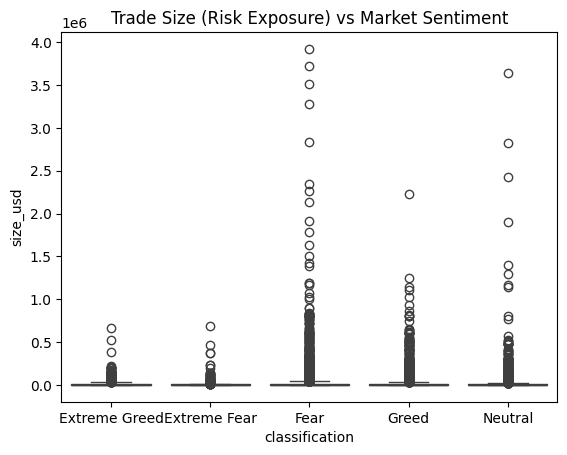

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_clean, x="classification", y="size_usd")
plt.title("Trade Size (Risk Exposure) vs Market Sentiment")
plt.show()


Analysis & Insights

Does trader performance (PnL) differ between Fear vs Greed days?
Method

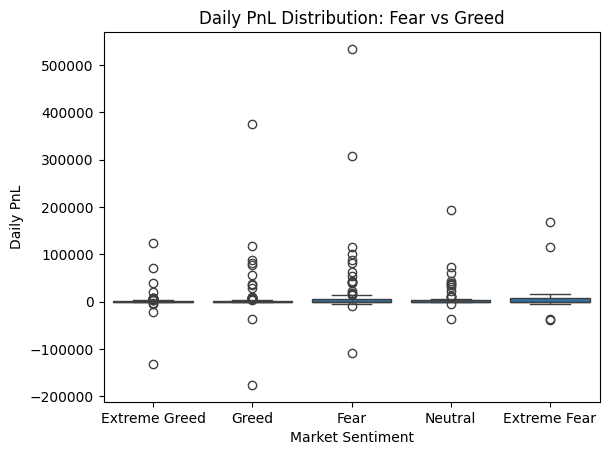

In [ ]:


sns.boxplot(data=daily_pnl, x="classification", y="closed_pnl")
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL")
plt.show()


Does win rate change with market sentiment?

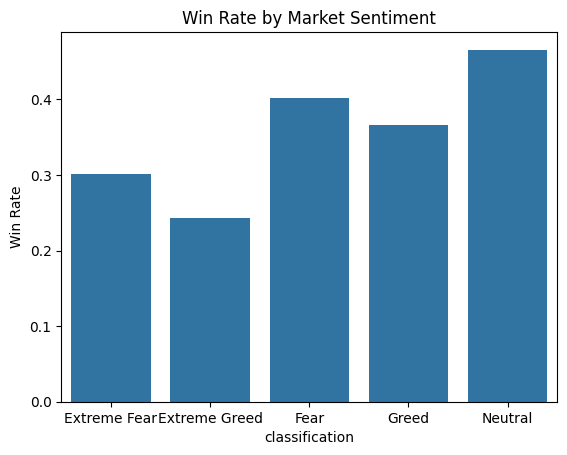

In [ ]:
sns.barplot(data=win_rate, x="classification", y="win")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


Daily trade count Fear vs Greed

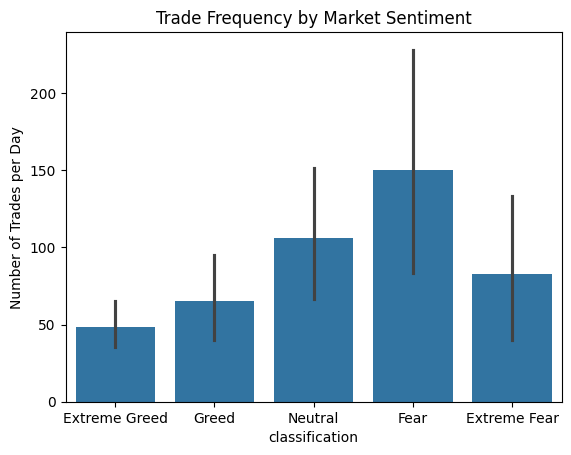

In [ ]:
sns.barplot(data=trades_per_day, x="classification", y="trade_count")
plt.title("Trade Frequency by Market Sentiment")
plt.ylabel("Number of Trades per Day")
plt.show()


In [ ]:
long_short.plot(kind="bar", stacked=True)
plt.title("Long vs Short Positions by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()


NameError: name 'long_short' is not defined

In [ ]:
long_short = merged_clean.groupby(
    ["classification", "side"]
).size().unstack(fill_value=0)


In [ ]:
long_short


side,BUY,SELL
classification,,
Extreme Fear,593,399
Extreme Greed,2084,2042
Fear,4937,4379
Greed,3731,4017
Neutral,2861,2882


Does long/short positioning change with sentiment?

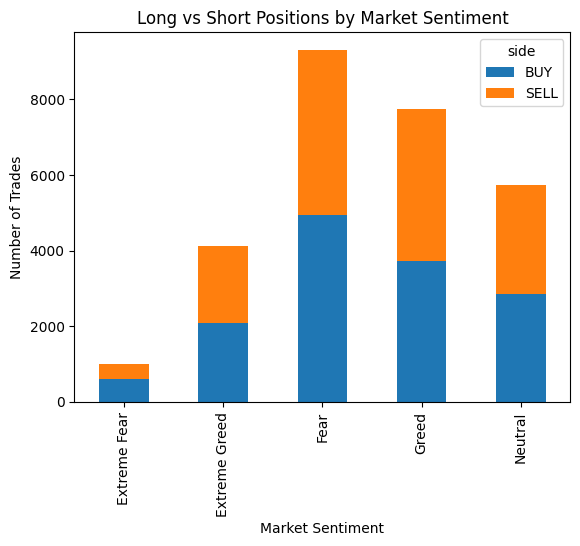

In [ ]:
long_short.plot(kind="bar", stacked=True)
plt.title("Long vs Short Positions by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()


Does trader risk exposure differ between Fear and Greed days?


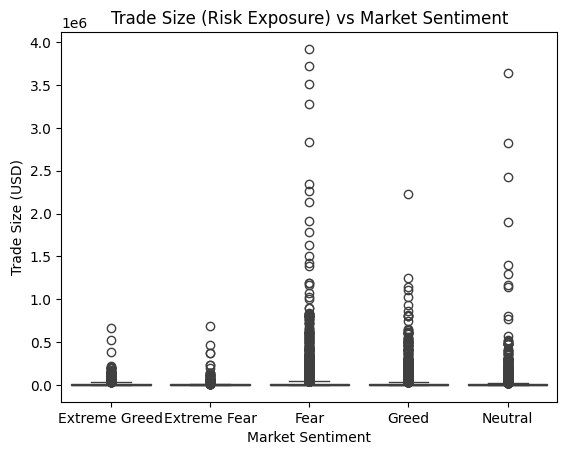

In [ ]:
sns.boxplot(data=merged_clean, x="classification", y="size_usd")
plt.title("Trade Size (Risk Exposure) vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.show()


Market sentiment significantly influences trader behavior and performance.
Greed periods are associated with higher PnL volatility, increased trade frequency, larger trade sizes, and long bias, while Fear periods reflect more conservative trading patterns.

Actionable Output (Strategies)

Actionable Output: Trading Rules Based on Market Sentiment

Analysis shows that trader performance and behavior vary significantly between Fear and Greed sentiment days. Based on these observations, the following actionable rules are proposed:



Rule 1: Risk Control During Fear Days
During Fear sentiment days, traders experience higher PnL volatility and slightly lower win rates, with a noticeable increase in short-biased trades. Hence, Fear days should be treated as high-risk environments. Traders, especially infrequent and inconsistent performers, should reduce position sizes, avoid excessive trading, and prioritize capital preservation over profit maximization.



Rule 2: Controlled Aggression During Greed Days
Greed sentiment days show higher trade activity and relatively stable or improved profitability. During these periods, consistent and frequent traders can increase trade participation moderately while maintaining disciplined risk management. Trend-aligned positions are more effective during Greed days, but leverage should remain controlled to avoid drawdowns from sudden reversals.



Overall Insight:
Market sentiment should be used as a risk-adjustment signal rather than a directional signal, helping traders dynamically adjust trade frequency and exposure instead of blindly predicting price direction.